In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('placement.csv')

In [7]:
df.sample(5)

,cgpa,placement_exam_marks,placed
941,7.18,8.0,0
633,6.63,39.0,1
397,7.55,63.0,0
695,6.75,11.0,1
596,8.48,25.0,1


In [11]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

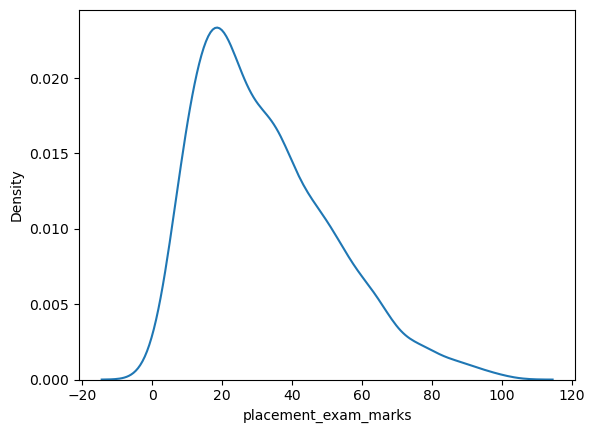

In [31]:
sns.kdeplot(df['placement_exam_marks']) #right skewed 

<Axes: xlabel='cgpa', ylabel='Density'>

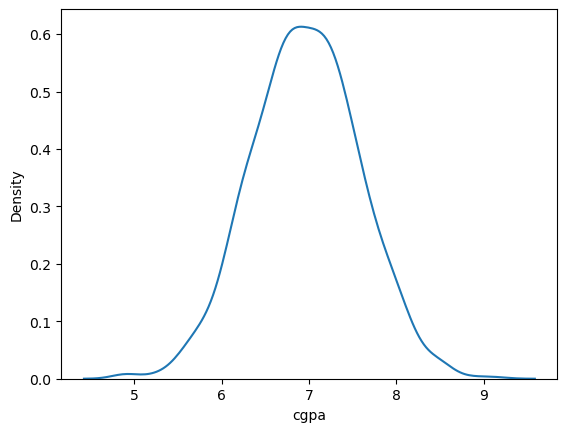

In [33]:
sns.kdeplot(df['cgpa'])    #normally distributed data

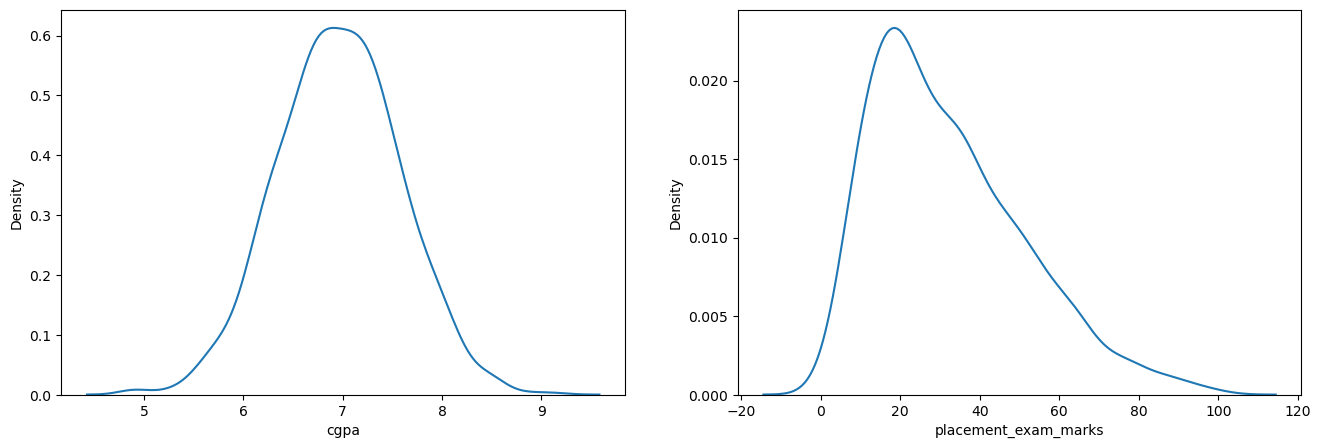

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df['cgpa']) 

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.show()

In [37]:
# Since only the CGPA columns data is normally distributed, we will only apply the z-score method on that particular column

In [41]:
# Finding the boundary values according to the formula

upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

print("Upper Limit is : ",upper_limit)
print("Lower Limit is : ",lower_limit)

Upper Limit is :  8.808933625397168
Lower Limit is :  5.113546374602832


In [47]:
# Finding the outliers

df[(df['cgpa'] > upper_limit) | (df['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [49]:
# Trimming (Completely removing)

new_df = df[(df['cgpa']>lower_limit) & (df['cgpa']<upper_limit)]

In [51]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [53]:
# We removed the outliers


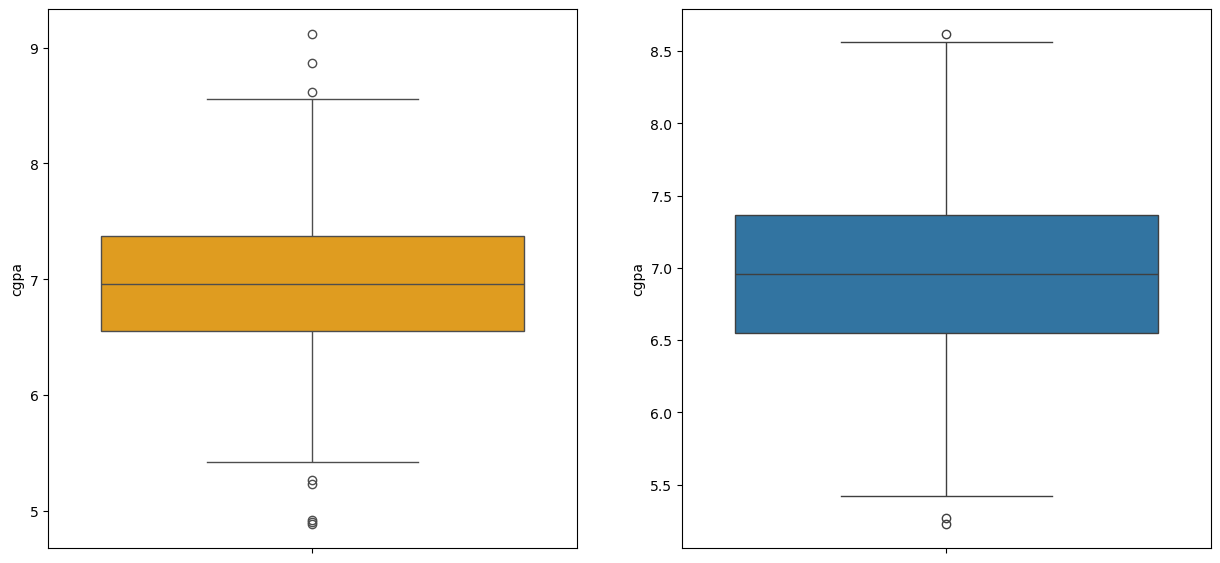

In [89]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.boxplot(df['cgpa'], color='orange')

plt.subplot(122)
sns.boxplot(new_df['cgpa'])
plt.show()

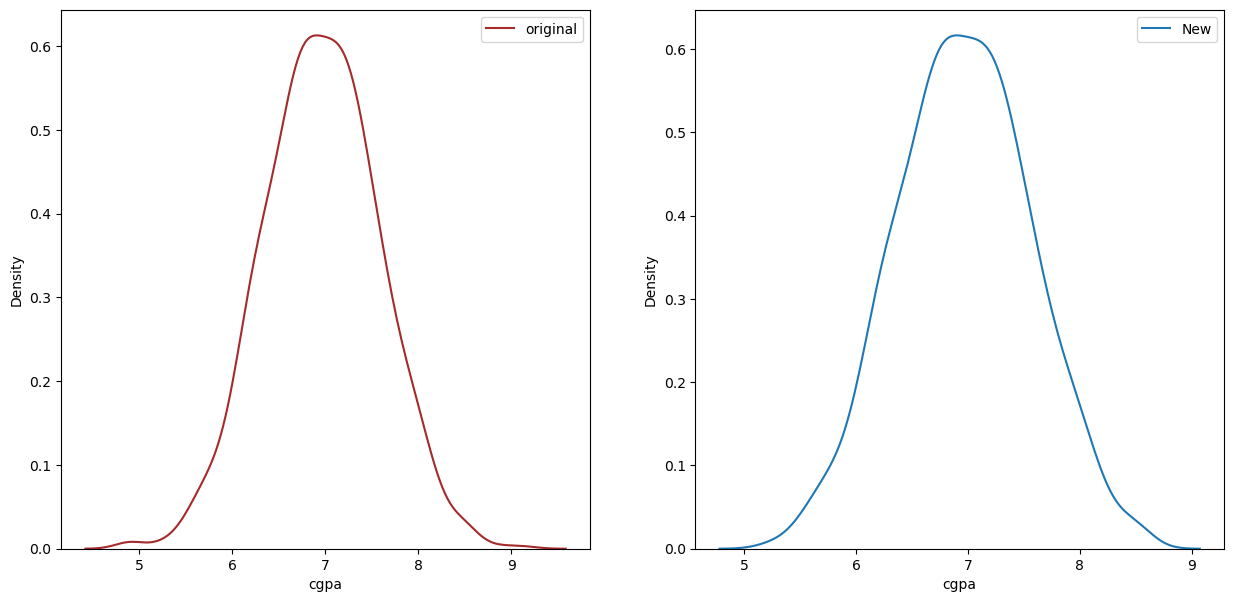

In [87]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.kdeplot(df['cgpa'], label='original', color='brown')
plt.legend()
plt.subplot(122)
sns.kdeplot(new_df['cgpa'], label='New')
plt.legend()

plt.show()

<h1>Capping</h1>

In [92]:
df['cgpa']=np.where(df['cgpa']<lower_limit,lower_limit,np.where(df['cgpa']>upper_limit,upper_limit,df['cgpa']))

In [94]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [98]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [100]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64